In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import glob
import seaborn as sns

# Preprocessing to make table for Shyam of variants with large descrepancies in beta values between OX and UC

- Treat UC as the discovery study and OX as the replication study
- Use an arbirary threshold of .000001 to define significance

Output:
1. uc_ox_tibia_results.txt: 

In [2]:
#load summary statistic data
ox_datadir = "/u/home/j/jzou1115/project-zarlab/CFW/MegaAnalysis_CFW_2019_Summary_Statistics/OX"
uc_datadir = "/u/home/j/jzou1115/project-zarlab/CFW/MegaAnalysis_CFW_2019_Summary_Statistics/UC"
pheno="tibia"
oxF = ox_datadir+"/"+pheno+".ox.assoc.txt.gz"
ucF = uc_datadir+"/"+pheno+".uc.assoc.txt.gz"

ox = pd.read_table(oxF, sep="\t")
uc = pd.read_table(ucF, sep="\t")
ox.index = ox["rs"]
uc.index = uc["rs"]
    
#subset to common snps
snps = set(ox.index).intersection(set(uc.index))
ox = ox.loc[snps,:]
uc = uc.loc[snps,:]

In [5]:
#arbitrary threshold for significance
threshold=.000001

In [3]:
ox.head()

,chr,rs,ps,n_miss,allele1,allele0,af,beta,se,l_remle,l_mle,p_wald,p_lrt,p_score
rs,,,,,,,,,,,,,,
chr7_74436745,7,chr7_74436745,74436745,0,G,T,0.177,0.017039,0.040999,2.116516,2.123623,0.677762,0.677126,0.677301
chr8_127620672,8,chr8_127620672,127620672,0,A,G,0.150,0.032027,0.043217,2.158672,2.166165,0.458736,0.458355,0.458485
chr15_12844443,15,chr15_12844443,12844443,0,C,G,0.471,-0.058939,0.030129,1.966173,1.973174,0.050589,0.050463,0.050947
chr5_89302687,5,chr5_89302687,89302687,0,C,T,0.396,0.054543,0.031936,1.989617,1.996575,0.087821,0.087515,0.087919
chr9_95492492,9,chr9_95492492,95492492,0,T,A,0.026,-0.252824,0.116752,2.107170,2.114924,0.030479,0.030556,0.031152


In [6]:
#Treat UC as the discovery study and OX as the replication study
uc_sig = uc[uc["p_lrt"]< threshold]
ox_sig = ox.loc[uc_sig.index,:]
print(uc_sig.shape, ox_sig.shape)

(1586, 14) (1586, 14)


In [11]:
#concatenate ox and uc raw data 
ox_cols = [ "ox."+c for c in ox.columns ]
uc_cols = [ "uc."+c for c in uc.columns ]
uc_sig.columns = uc_cols
ox_sig.columns = ox_cols

In [12]:
results = pd.concat([uc_sig, ox_sig], axis=1)
results.shape

(1586, 28)

In [13]:
results.head()

,uc.chr,uc.rs,uc.ps,uc.n_miss,uc.allele1,uc.allele0,uc.af,uc.beta,uc.se,uc.l_remle,...,ox.allele1,ox.allele0,ox.af,ox.beta,ox.se,ox.l_remle,ox.l_mle,ox.p_wald,ox.p_lrt,ox.p_score
rs,,,,,,,,,,,,,,,,,,,,,
chr12_83296345,12,chr12_83296345,83296345,0,T,C,0.731,0.253389,0.048709,1.853357,...,T,C,0.731,0.200324,0.034586,1.833292,1.839776,8.162437e-09,8.046495e-09,1.120592e-08
chr12_83301078,12,chr12_83301078,83301078,0,T,C,0.730,0.253452,0.048674,1.853104,...,T,C,0.729,0.199173,0.034473,1.835328,1.841824,8.880556e-09,8.768195e-09,1.219335e-08
chr12_83809516,12,chr12_83809516,83809516,0,C,G,0.653,0.255698,0.046027,1.738919,...,C,G,0.676,0.168317,0.032758,1.819137,1.825613,3.069962e-07,3.021387e-07,3.720940e-07
chr12_83837443,12,chr12_83837443,83837443,0,T,C,0.683,0.257406,0.047854,1.741034,...,T,C,0.689,0.170691,0.033305,1.807262,1.813679,3.286959e-07,3.218682e-07,3.933353e-07
chr12_83847391,12,chr12_83847391,83847391,0,G,T,0.687,0.242010,0.048653,1.776136,...,G,T,0.682,0.183532,0.033735,1.820489,1.826964,6.027037e-08,5.917803e-08,7.650797e-08


In [16]:
#compute absolute difference in beta between studies and sort by difference
results["diff.beta"] = abs(results["ox.beta"] - results["uc.beta"])
results.sort_values(by="diff.beta", ascending=False, inplace=True)
results.head()

,uc.chr,uc.rs,uc.ps,uc.n_miss,uc.allele1,uc.allele0,uc.af,uc.beta,uc.se,uc.l_remle,...,ox.allele0,ox.af,ox.beta,ox.se,ox.l_remle,ox.l_mle,ox.p_wald,ox.p_lrt,ox.p_score,diff.beta
rs,,,,,,,,,,,,,,,,,,,,,
chr6_147045013,6,chr6_147045013,147045013,0,G,T,0.002,-55.490290,10.799120,1.876618,...,T,0.003,-58.427770,8.211493,1.845549,1.851782,1.593804e-12,1.564877e-12,3.202557e-12,2.937480
chr12_84274249,12,chr12_84274249,84274249,0,G,T,0.508,-0.398069,0.073533,1.956526,...,T,0.635,0.154801,0.034215,1.820037,1.826613,6.446130e-06,6.383250e-06,7.296363e-06,0.552869
chr12_84272717,12,chr12_84272717,84272717,0,G,T,0.505,-0.391152,0.071160,1.945306,...,T,0.638,0.156593,0.034678,1.820598,1.827179,6.713514e-06,6.650511e-06,7.597680e-06,0.547745
chr12_84252484,12,chr12_84252484,84252484,0,C,A,0.444,-0.357511,0.065535,1.917973,...,A,0.620,0.162793,0.034584,1.826585,1.833190,2.700033e-06,2.679266e-06,3.135699e-06,0.520304
chr12_84250446,12,chr12_84250446,84250446,0,C,T,0.441,-0.355397,0.065720,1.911984,...,T,0.619,0.164571,0.034712,1.827662,1.834271,2.289959e-06,2.273145e-06,2.672611e-06,0.519967


In [ ]:
#save results to file
results.to_csv("/u/home/j/jzou1115/project-zarlab/CFW/MegaAnalysis_CFW_Code/debug_allele_flip/uc_ox_tibia_results.txt", sep="\t")

# Looking at potential causes of the differences in observed effect sizes

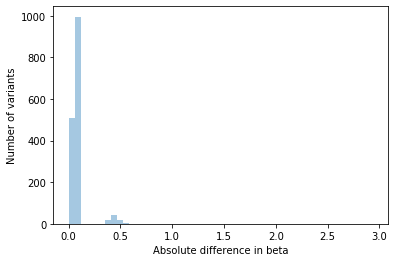

In [24]:
#plot distribution of diff.beta
sns.distplot(results["diff.beta"], kde=False, rug=False)
plt.xlabel("Absolute difference in beta")
plt.ylabel("Number of variants")
plt.savefig("/u/home/j/jzou1115/project-zarlab/CFW/MegaAnalysis_CFW_Code/debug_allele_flip/dist_diff_beta.png")

## Looking at types of SNPs
- T/C and A/G seem to have higher discrepancy in beta values than other pairs

In [29]:
#compute what kind of snps have this issue 
#create a pair called allele.pair with (ox.allele0, ox.allele1).  This should be identical to (uc.allele0, uc.allele1).
results["allele.pair"] = [results.loc[i, "ox.allele0"]+"_"+results.loc[i, "ox.allele1"] for i in results.index ]
set(results["allele.pair"])

{'A_C',
 'A_G',
 'A_T',
 'C_A',
 'C_G',
 'C_T',
 'G_A',
 'G_C',
 'G_T',
 'T_A',
 'T_C',
 'T_G'}

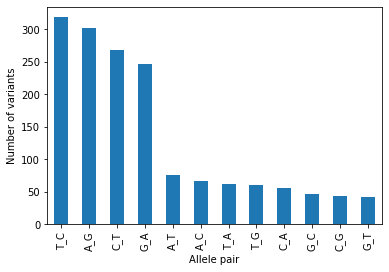

In [38]:
results["allele.pair"].value_counts().plot(kind="bar")
plt.xlabel("Allele pair")
plt.ylabel("Number of variants")
plt.savefig("/u/home/j/jzou1115/project-zarlab/CFW/MegaAnalysis_CFW_Code/debug_allele_flip/freq_allele_pairs.png")

## Error occurs in multiple variants within a locus

- Plotted 20 variants with large difference in beta values (most variants are from 2 loci)
- See diff_beta_locus_chr12_84091942.png for example

In [59]:
#results: pandas df created above
#snp: snp of interest with high diff.beta value
#dist: distance to look from SNP 
#outfile: path to save plot
def plotDiffBetaLocus(results, snp, dist, outfile):
    pos = int(snp.split("_")[1])
    start = max(pos - dist, 0)
    end = pos + dist
    chrm = int(snp.split("_")[0][3:])
    locus = results[(results["uc.chr"] == chrm) & (results["uc.ps"] < end) & (results["uc.ps"] > start)]
    plt.scatter(locus["uc.ps"], locus["diff.beta"])
    plt.title(snp)
    plt.xlabel("Position")
    plt.ylabel("Absolute difference in beta")
    plt.tight_layout()
    plt.savefig(outfile)
    plt.clf()

In [60]:
for i in results.index[:20]:
    dist = 5000000
    outdir="/u/home/j/jzou1115/project-zarlab/CFW/MegaAnalysis_CFW_Code/debug_allele_flip"
    outfile = outdir+"/diff_beta_locus_"+i+".png"
    plotDiffBetaLocus(results, i, dist, outfile)

<Figure size 432x288 with 0 Axes>